# Data Understanding

Mengimport library yang akan digunakan

In [1]:
import pandas as pd
import numpy as np

from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
# Import module yang disediakan google colab untuk kebutuhan upload file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tarqhs","key":"cbe702f0bf5cc71fe305081bcccccf6b"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Mengunduh dataset yang akan digunakan pada platform dataset kaggle

In [4]:
#!/bin/bash
!kaggle datasets download -d arashnic/book-recommendation-dataset

Dataset URL: https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset
License(s): CC0-1.0
  0% 0.00/24.3M [00:00<?, ?B/s]
100% 24.3M/24.3M [00:00<00:00, 1.13GB/s]


Mengekstrak dataset yang telah diunduh

In [5]:
!unzip book-recommendation-dataset.zip

Archive:  book-recommendation-dataset.zip
  inflating: Books.csv               
  inflating: DeepRec.png             
  inflating: Ratings.csv             
  inflating: Users.csv               
  inflating: classicRec.png          
  inflating: recsys_taxonomy2.png    


Membaca file csv dan menyimpan ke dalam masing masing variabel df_books, df_ratings, df_users

In [6]:
df_books = pd.read_csv('Books.csv')
df_ratings = pd.read_csv('Ratings.csv')
df_users = pd.read_csv('Users.csv')

<ipython-input-6-3c363646951a>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_books = pd.read_csv('Books.csv')


Menampilkan 5 data buku

In [7]:
df_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [8]:
df_ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [9]:
df_users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


# Univariate Exploratory Data Analysis

Melihat informasi dataset seperti tipe data dan jumlah data

In [10]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [11]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [12]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


Menampilkan jumlah buku unik berdasarkan kolom isbn

In [13]:
print('Banyak buku: ', len(df_books.ISBN.unique()))

Banyak buku:  271360


Menghitung jumlah penulis buku (authors)

In [14]:
df_books['Book-Author'].value_counts()

,count
Book-Author,
Agatha Christie,632
William Shakespeare,567
Stephen King,524
Ann M. Martin,423
Carolyn Keene,373
...,...
JÃ¶rn Kalkbrenner,1
Paul A. Lynn,1
Arthur Bernard Williams,1


Menghitung jumlah publisher buku (Publisher)

In [15]:
df_books['Publisher'].value_counts()

,count
Publisher,
Harlequin,7535
Silhouette,4220
Pocket,3905
Ballantine Books,3783
Bantam Books,3646
...,...
Scholastic (An Apple Paperback),1
Spencer Butte Press,1
Kowalski,1


Menghitung jumlah users yang memberikan rating (User_ID)

In [16]:
df_ratings['User-ID'].value_counts()

,count
User-ID,
11676,13602
198711,7550
153662,6109
98391,5891
35859,5850
...,...
119573,1
276706,1
276697,1


Menghitung jumlah rating pada buku yang diberikan oleh user (ISBN)

In [17]:
df_ratings['ISBN'].value_counts()

,count
ISBN,
0971880107,2502
0316666343,1295
0385504209,883
0060928336,732
0312195516,723
...,...
0671883917,1
0743257502,1
0767409752,1


Menghitung jumlah masing masing nilai rating

In [18]:
df_ratings['Book-Rating'].value_counts()

,count
Book-Rating,
0,716109
8,103736
10,78610
7,76457
9,67541
5,50974
6,36924
4,8904
3,5996


# Data Preprocessing

Menggabungkan data buku dengan data rating buku

In [19]:
# Menggabungkan seluruh ISBN pada buku
books_all = np.concatenate((
    df_books.ISBN.unique(),
    df_ratings.ISBN.unique(),
))

# Mengurutkan data dan menghapus data yang sama
books_all = np.sort(np.unique(books_all))

print('Jumlah seluruh data buku berdasarkan ISBN: ', len(books_all))

Jumlah seluruh data buku berdasarkan ISBN:  341765


Menggabungkan Seluruh User

In [20]:
# Menggabungkan seluruh userID
users_all = np.concatenate((
    df_ratings['User-ID'].unique(),
    df_users['User-ID'].unique(),
))

# Menghapus data yang sama kemudian mengurutkannya
users_all = np.sort(np.unique(users_all))

print('Jumlah seluruh user: ', len(users_all))

Jumlah seluruh user:  278858


Menggabungkan dataframe books dan ratings berdasarkan nilai ISBN

In [21]:
# Menggabungkan dataframe df_books dengan df_ratings berdasarkan nilai ISBN
books_merge = pd.merge(df_books, df_ratings , on='ISBN', how='inner')
books_merge

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0
...,...,...,...,...,...,...,...,...,...,...
1031131,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,276463,7
1031132,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,276579,4
1031133,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,276680,0
1031134,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,276680,0


Menggabungkan dataframe books_merge dan users berdasarkan nilai User-ID

In [22]:
# Menggabungkan dataframe books_merge dengan df_users berdasarkan nilai User-ID
books = pd.merge(books_merge, df_users , on='User-ID', how='inner')
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",NaN
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0,"ottawa, ontario, canada",49.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8,"n/a, n/a, n/a",NaN
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0,"sudbury, ontario, canada",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1031131,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,276463,7,"providence, rhode island, usa",26.0
1031132,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,276579,4,"orem, utah, usa",12.0
1031133,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,276680,0,"hopewell junction, new york, usa",55.0
1031134,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,276680,0,"hopewell junction, new york, usa",55.0


Memeriksa missing value

In [23]:
# Cek missing value dengan fungsi isnull()
books.isnull().sum()

,0
ISBN,0
Book-Title,0
Book-Author,2
Year-Of-Publication,0
Publisher,2
Image-URL-S,0
Image-URL-M,0
Image-URL-L,4
User-ID,0
Book-Rating,0


# Data Preparation

Mengatasi Missing Value

In [24]:
# Membersihkan missing value dengan fungsi dropna()
books_clean = books.dropna()
books_clean

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0,"ottawa, ontario, canada",49.0
5,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,67544,8,"toronto, ontario, canada",30.0
6,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,85526,0,"victoria, british columbia, canada",36.0
7,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,96054,0,"ottawa, ontario, canada",29.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1031131,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,276463,7,"providence, rhode island, usa",26.0
1031132,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,276579,4,"orem, utah, usa",12.0
1031133,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,276680,0,"hopewell junction, new york, usa",55.0
1031134,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,276680,0,"hopewell junction, new york, usa",55.0


Memeriksa kembali missing value pada variabel books_clean

In [25]:
# Mengecek kembali missing value pada variabel books_clean
books_clean.isnull().sum()

,0
ISBN,0
Book-Title,0
Book-Author,0
Year-Of-Publication,0
Publisher,0
Image-URL-S,0
Image-URL-M,0
Image-URL-L,0
User-ID,0
Book-Rating,0


Mengurutkan buku secara ascending berdasarkan nilai ISBN

In [26]:
# Mengurutkan buku berdasarkan ISBN kemudian memasukkannya ke dalam variabel fix_books
fix_books = books_clean.sort_values('ISBN', ascending=True)
fix_books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
1013651,0000913154,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967,Simon &amp; Schuster,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...,171118,8,"toronto, ontario, canada",47.0
968139,0001010565,Mog's Christmas,Judith Kerr,1992,Collins,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,209516,0,"felixstowe, suffolk, united kingdom",57.0
788100,0001046713,Twopence to Cross the Mersey,Helen Forrester,1992,HarperCollins Publishers,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...,196149,0,"lisburn, northern ireland, united kingdom",29.0
859117,0001046934,The Prime of Miss Jean Brodie,Muriel Spark,1999,Trafalgar Square Publishing,http://images.amazon.com/images/P/0001046934.0...,http://images.amazon.com/images/P/0001046934.0...,http://images.amazon.com/images/P/0001046934.0...,206300,0,"london, england, united kingdom",34.0
983063,0001047663,Matter Of Honour,Jeffrey Archer,2000,Trafalgar Square Books,http://images.amazon.com/images/P/0001047663.0...,http://images.amazon.com/images/P/0001047663.0...,http://images.amazon.com/images/P/0001047663.0...,246671,0,"melbourne, victoria, australia",27.0
...,...,...,...,...,...,...,...,...,...,...,...,...
670608,B000234N76,Falling Angels,Tracy Chevalier,2001,E P Dutton,http://images.amazon.com/images/P/B000234N76.0...,http://images.amazon.com/images/P/B000234N76.0...,http://images.amazon.com/images/P/B000234N76.0...,264317,0,"portela de sacavém, loures, portugal",25.0
937591,B000234NC6,It Must've Been Something I Ate: The Return of...,Jeffrey Steingarten,2002,Knopf,http://images.amazon.com/images/P/B000234NC6.0...,http://images.amazon.com/images/P/B000234NC6.0...,http://images.amazon.com/images/P/B000234NC6.0...,100906,0,"seattle, washington, usa",34.0
828933,B00029DGGO,"Good Wife Strikes Back, The",Elizabeth Buchan,0,Viking Adult,http://images.amazon.com/images/P/B00029DGGO.0...,http://images.amazon.com/images/P/B00029DGGO.0...,http://images.amazon.com/images/P/B00029DGGO.0...,100088,0,"burnley, england, united kingdom",26.0
916406,B0002JV9PY,The Blockade Runners,Jules Verne,0,Digireads.com,http://images.amazon.com/images/P/B0002JV9PY.0...,http://images.amazon.com/images/P/B0002JV9PY.0...,http://images.amazon.com/images/P/B0002JV9PY.0...,179791,0,"sydney, new south wales, australia",22.0


Mengecek jumlah buku pada variabel fix_books

In [27]:
# Mengecek berapa jumlah fix_books
len(fix_books.ISBN.unique())

228995

Mengecek jumlah book author pada variabel fix_books

In [28]:
# Mengecek book author yang unik
fix_books['Book-Author'].unique()

array(['C. van Amerongen (translator)', 'Judith Kerr', 'Helen Forrester',
       ..., 'Mark Shepard', 'Rachel Abramowitz',
       'P Ed Varnedoe/Antonelli Kick'], dtype=object)

Mengurutkan buku berdasarkan ISBN kemudian menyimpan nya ke dalam variabel preparation

In [29]:
# Membuat variabel preparation yang berisi dataframe fix_books kemudian mengurutkan berdasarkan ISBN
preparation = fix_books
preparation.sort_values('ISBN')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
1013651,0000913154,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967,Simon &amp; Schuster,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...,171118,8,"toronto, ontario, canada",47.0
968139,0001010565,Mog's Christmas,Judith Kerr,1992,Collins,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,209516,0,"felixstowe, suffolk, united kingdom",57.0
788100,0001046713,Twopence to Cross the Mersey,Helen Forrester,1992,HarperCollins Publishers,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...,196149,0,"lisburn, northern ireland, united kingdom",29.0
859117,0001046934,The Prime of Miss Jean Brodie,Muriel Spark,1999,Trafalgar Square Publishing,http://images.amazon.com/images/P/0001046934.0...,http://images.amazon.com/images/P/0001046934.0...,http://images.amazon.com/images/P/0001046934.0...,206300,0,"london, england, united kingdom",34.0
983063,0001047663,Matter Of Honour,Jeffrey Archer,2000,Trafalgar Square Books,http://images.amazon.com/images/P/0001047663.0...,http://images.amazon.com/images/P/0001047663.0...,http://images.amazon.com/images/P/0001047663.0...,246671,0,"melbourne, victoria, australia",27.0
...,...,...,...,...,...,...,...,...,...,...,...,...
670608,B000234N76,Falling Angels,Tracy Chevalier,2001,E P Dutton,http://images.amazon.com/images/P/B000234N76.0...,http://images.amazon.com/images/P/B000234N76.0...,http://images.amazon.com/images/P/B000234N76.0...,264317,0,"portela de sacavém, loures, portugal",25.0
937591,B000234NC6,It Must've Been Something I Ate: The Return of...,Jeffrey Steingarten,2002,Knopf,http://images.amazon.com/images/P/B000234NC6.0...,http://images.amazon.com/images/P/B000234NC6.0...,http://images.amazon.com/images/P/B000234NC6.0...,100906,0,"seattle, washington, usa",34.0
828933,B00029DGGO,"Good Wife Strikes Back, The",Elizabeth Buchan,0,Viking Adult,http://images.amazon.com/images/P/B00029DGGO.0...,http://images.amazon.com/images/P/B00029DGGO.0...,http://images.amazon.com/images/P/B00029DGGO.0...,100088,0,"burnley, england, united kingdom",26.0
916406,B0002JV9PY,The Blockade Runners,Jules Verne,0,Digireads.com,http://images.amazon.com/images/P/B0002JV9PY.0...,http://images.amazon.com/images/P/B0002JV9PY.0...,http://images.amazon.com/images/P/B0002JV9PY.0...,179791,0,"sydney, new south wales, australia",22.0


Menghapus data duplikat pada buku berdasarkan ISBN agar dapat diproses lebih lanjut untuk pemodelan

In [30]:
# Membuang data duplikat pada variabel preparation
preparation = preparation.drop_duplicates('ISBN')
preparation

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
1013651,0000913154,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967,Simon &amp; Schuster,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...,171118,8,"toronto, ontario, canada",47.0
968139,0001010565,Mog's Christmas,Judith Kerr,1992,Collins,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,209516,0,"felixstowe, suffolk, united kingdom",57.0
788100,0001046713,Twopence to Cross the Mersey,Helen Forrester,1992,HarperCollins Publishers,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...,196149,0,"lisburn, northern ireland, united kingdom",29.0
859117,0001046934,The Prime of Miss Jean Brodie,Muriel Spark,1999,Trafalgar Square Publishing,http://images.amazon.com/images/P/0001046934.0...,http://images.amazon.com/images/P/0001046934.0...,http://images.amazon.com/images/P/0001046934.0...,206300,0,"london, england, united kingdom",34.0
983063,0001047663,Matter Of Honour,Jeffrey Archer,2000,Trafalgar Square Books,http://images.amazon.com/images/P/0001047663.0...,http://images.amazon.com/images/P/0001047663.0...,http://images.amazon.com/images/P/0001047663.0...,246671,0,"melbourne, victoria, australia",27.0
...,...,...,...,...,...,...,...,...,...,...,...,...
670608,B000234N76,Falling Angels,Tracy Chevalier,2001,E P Dutton,http://images.amazon.com/images/P/B000234N76.0...,http://images.amazon.com/images/P/B000234N76.0...,http://images.amazon.com/images/P/B000234N76.0...,264317,0,"portela de sacavém, loures, portugal",25.0
937591,B000234NC6,It Must've Been Something I Ate: The Return of...,Jeffrey Steingarten,2002,Knopf,http://images.amazon.com/images/P/B000234NC6.0...,http://images.amazon.com/images/P/B000234NC6.0...,http://images.amazon.com/images/P/B000234NC6.0...,100906,0,"seattle, washington, usa",34.0
828933,B00029DGGO,"Good Wife Strikes Back, The",Elizabeth Buchan,0,Viking Adult,http://images.amazon.com/images/P/B00029DGGO.0...,http://images.amazon.com/images/P/B00029DGGO.0...,http://images.amazon.com/images/P/B00029DGGO.0...,100088,0,"burnley, england, united kingdom",26.0
916406,B0002JV9PY,The Blockade Runners,Jules Verne,0,Digireads.com,http://images.amazon.com/images/P/B0002JV9PY.0...,http://images.amazon.com/images/P/B0002JV9PY.0...,http://images.amazon.com/images/P/B0002JV9PY.0...,179791,0,"sydney, new south wales, australia",22.0


In [31]:
# Mengambil 8000 data secara acak agar proses perhitungan cosine similarity,
# pada matrix tf-idf di tahap modeling content based filtering berjalan dengan lancar tanpa mengalami ram crash
# pada google colab dengan ukuran dataset besar

sampled_8000_df = preparation.sample(n=8000, random_state=42)

Mengonversi data ISBN, Book-Title, dan Book-Author ke dalam bentuk list

In [32]:
# Mengonversi data series 'ISBN' menjadi dalam bentuk list
books_id = sampled_8000_df['ISBN'].tolist()

# Mengonversi data series 'Book-Title' menjadi dalam bentuk list
books_title = sampled_8000_df['Book-Title'].tolist()

# Mengonversi data series 'Book-Author' menjadi dalam bentuk list
books_author = sampled_8000_df['Book-Author'].tolist()

print(len(books_id))
print(len(books_title))
print(len(books_author))

8000
8000
8000


Membuat dictionary untuk variabel books_id, books_title, dan books_author yang telah dibuat sebelumnya

In [33]:
# Membuat dictionary untuk data books_id, books_title, books_author
books_new = pd.DataFrame({
    'id': books_id,
    'book_title': books_title,
    'book_author': books_author
})
books_new

,id,book_title,book_author
0,8435006484,El Salon Dorado (Narrativas Historicas Edhasa),Jose Luis Corral Lafuente
1,0756400007,Flightless Falcon,Mickey Zucker Reichert
2,0345434137,Chicks Rule: The Story of the Dixie Chicks,Scott Gray
3,0773673881,Maria Chapdelaine,Louis Hemon
4,0345428927,Heart and Soul,SALLY MANDEL
...,...,...,...
7995,0060555882,What Memories Remain,Cait London
7996,0843942428,Winter Seasons,Sylvie Sommerfield
7997,0531087484,Humming Whispers,Angela Johnson
7998,0060394307,The Water and the Blood: A Novel,Nancy E. Turner


# Model Development dengan Content Based Filtering

Memeriksa kembali data books_new dan assign dataframe dari tahap sebelumnya ke dalam variabel data

In [34]:
data = books_new
data.sample(5)

,id,book_title,book_author
2054,0821718444,Moondeath,Rick Hautala
2858,0373261586,Desert Sinner,Ralph M. McInerny
7681,0399140913,After All,Mary Tyler Moore
5316,0590424440,How Spider Saved Santa Bug,Robert Kraus
3003,0373255837,"Sex, Lies And Leprechauns (Harlequin Temptatio...",Renee Roszel


Menemukan representasi fitur penting dari setiap book author

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data book_author
tf.fit(data['book_author'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['aaaaaa', 'aaron', 'abanes', ..., 'â¼ller', 'â¼nter', 'â¼rgen'],
      dtype=object)

Melakukan fit dan transformasi ke dalam bentuk matriks

In [36]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(data['book_author'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(8000, 6385)

Menghasilkan vektor tf-idf dalam bentuk matriks

In [37]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan book_author
# Baris diisi dengan book_title

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data.book_title
).sample(22, axis=1).sample(10, axis=0)

,augusta,sollors,rebecca,burkholz,giglio,deci,locke,wood,breck,bernardi,...,valls,serventy,samuel,jance,silk,priscilla,mcbain,harburg,craig,jennifer
book_title,,,,,,,,,,,,,,,,,,,,,
Plato: The Republic (Penguin Classics),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Life is Just a Chair of Bowlies (Mini),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Vive l'enfer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Spanish Husband (Presents Passion) (Harlequin Presents, 2145)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Foggage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
An Invitation to Love (Candlelight Ecstasy Romance),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Black Prince,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Psycho II: Connie Ha,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Young Indiana Jones and the Lost Gold of Durango (Young Indiana Jones Book, No 10)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Menghitung derajat kesamaan (similarity degree) antar buku dengan teknik cosine similarity

In [39]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Melihat matriks kesamaan setiap buku dengan menampilkan book_title dalam 5 sampel kolom dan 10 sampel baris

In [40]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa book_title
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['book_title'], columns=data['book_title'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap resto
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (8000, 8000)


book_title,Resourceful Woman (Gale Research),The Magic School Bus Blows Its Top: A Book About Volcanoes,Into the Out of,Dragon Weather (Obsidian Chronicles),"Perl and CGI for the World Wide Web: Visual QuickStart Guide, Second Edition"
book_title,,,,,
Wish Come True,0.0,0.0,0.0,0.0,0.0
"Disney's 101 Dalmatians Little Library: A Trip to the Country, a Night Out, Home Sweet Home, Sitting Pretty in the City",0.0,0.0,0.0,0.0,0.0
The Sandglass,0.0,0.0,0.0,0.0,0.0
GUB GUB'S BOOK,0.0,0.0,0.0,0.0,0.0
A Wedding Story,0.0,0.0,0.0,0.0,0.0
"WHERE THEY AIN'T : THE FABLED LIFE AND UNTIMELY DEATH OF THE ORIGINAL BALTIMORE ORIOLES, THE TEAM THAT GAVE BIRTH TO MODERN BASEBALL",0.0,0.0,0.0,0.0,0.0
Angels in a Harsh World,0.0,0.0,0.0,0.0,0.0
Schicksal Aus Zweiter Hand,0.0,0.0,0.0,0.0,0.0
Lesbians at Midlife: The Creative Transition,0.0,0.0,0.0,0.0,0.0


Membuat fungsi books_recommendations dengan beberapa parameter seperti judul_buku, similarity_data, items dan k

In [41]:
def books_recommendations(judul_buku, similarity_data=cosine_sim_df, items=data[['book_title', 'book_author']], k=5):
    """
    Rekomendasi Resto berdasarkan kemiripan dataframe

    Parameter:
    ---
    judul_buku : tipe data string (str)
                Judul Buku (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan buku sebagai
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---


    Pada index ini, kita mengambil k dengan nilai similarity terbesar
    pada index matrix yang diberikan (i).
    """


    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,judul_buku].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop judul_buku agar judul buku yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(judul_buku, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

Melihat detail informasi id, book_title, dan book_author pada sebuah buku

In [42]:
data[data.book_title.eq('The age of innocence')]

,id,book_title,book_author
1570,0760700141,The age of innocence,Edith Wharton


In [43]:
# Mendapatkan rekomendasi buku yang mirip dengan The age of innocence
books_recommendations('The age of innocence')

,book_title,book_author
0,Souls Belated (Everyman S.),Edith Wharton
1,The House of Mirth,Edith Wharton
2,Country Diary of an Edwardian Lady,Edith Holden
3,Vom GlÃ?Â¼ck mit der Natur zu leben.,Edith Holden
4,The Five Children and It,Edith Nesbit


Melakukan evaluasi metrik dengan precision pada sistem rekomendasi Content Based Filtering, hal ini dilakukan untuk memeriksa ada berapa banyak atau persentase konten relevan (similiar) yang direkomendasikan

In [47]:
precision = (2 / 5) * 100
print('Precision: ', precision, '%')

Precision:  40.0 %


# Model Development dengan Collaborative Filtering

Mengambil kolom User-ID, ISBN, Book-Rating pada dataframe preparation untuk disimpan di variabel baru df

In [ ]:
rating = ['User-ID', 'ISBN', 'Book-Rating']

In [ ]:
df = preparation[rating]
df.head()

,User-ID,ISBN,Book-Rating
1013651,171118,0000913154,8
968139,209516,0001010565,0
788100,196149,0001046713,0
859117,206300,0001046934,0
983063,246671,0001047663,0


## Data Preparation

Melakukan persiapan data untuk menyandikan (encode) fitur ‘User-ID’ ke dalam indeks integer

In [ ]:
# Mengubah userID menjadi list tanpa nilai yang sama
user_ids = df['User-ID'].unique().tolist()
print('list User-ID: ', user_ids)

# Melakukan encoding User-ID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded User-ID : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke User-ID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke User-ID: ', user_encoded_to_user)

list User-ID:  [171118, 209516, 196149, 206300, 246671, 251613, 11944, 28204, 109901, 76626, 85526, 95359, 198711, 10067, 16319, 266866, 43962, 156534, 274301, 52853, 176062, 110029, 70969, 201017, 96473, 115875, 108091, 44925, 56399, 122874, 145927, 175886, 181659, 229329, 265595, 110746, 215677, 89514, 69078, 63714, 243930, 201526, 208410, 184401, 93366, 101606, 263325, 36907, 13221, 137686, 98510, 106988, 170184, 120565, 219008, 224121, 175119, 274004, 246617, 189733, 193560, 227436, 181077, 114066, 14449, 204946, 222586, 268932, 130085, 68743, 17507, 129598, 98573, 27617, 36836, 217121, 138844, 52441, 263637, 161619, 159506, 180651, 61147, 107697, 91449, 147166, 111550, 76942, 5899, 214528, 25489, 35050, 227538, 133008, 172742, 29070, 259378, 265031, 263877, 93698, 31831, 158594, 225986, 111480, 177458, 12927, 52606, 144131, 155287, 114178, 236340, 186457, 219445, 174478, 274057, 149908, 189334, 200226, 204835, 277996, 153662, 171078, 271542, 213113, 5903, 72214, 269309, 60626, 577

Melakukan persiapan data untuk menyandikan (encode) fitur ‘ISBN’ ke dalam indeks integer

In [ ]:
# Mengubah ISBN menjadi list tanpa nilai yang sama
books_ids = df['ISBN'].unique().tolist()

# Melakukan proses encoding ISBN
books_to_books_encoded = {x: i for i, x in enumerate(books_ids)}

# Melakukan proses encoding angka ke ISBN
books_encoded_to_books = {i: x for i, x in enumerate(books_ids)}

Memetakan User-ID dan ISBN ke dataframe yang berkaitan.

In [ ]:
# Mapping User-ID ke dataframe users
df['user'] = df['User-ID'].map(user_to_user_encoded)

# Mapping ISBN ke dataframe books
df['book'] = df['ISBN'].map(books_to_books_encoded)

<ipython-input-65-3d61554a704e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['user'] = df['User-ID'].map(user_to_user_encoded)
<ipython-input-65-3d61554a704e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['book'] = df['ISBN'].map(books_to_books_encoded)


Memeriksa beberapa hal dalam data seperti jumlah user, jumlah buku, dan mengubah nilai rating menjadi float

In [ ]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah buku
num_books = len(books_encoded_to_books)
print(num_books)

# Mengubah rating menjadi nilai float
df['rating'] = df['Book-Rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(df['rating'])

# Nilai maksimal rating
max_rating = max(df['rating'])

print('Number of User: {}, Number of Resto: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_books, min_rating, max_rating
))

26319
228995
Number of User: 26319, Number of Resto: 228995, Min Rating: 0.0, Max Rating: 10.0


<ipython-input-67-72bb4cb3f14f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = df['Book-Rating'].values.astype(np.float32)


Melakukan pembagian data menjadi data training dan validasi. Sebelum itu, mengacak datanya terlebih dahulu agar distribusinya menjadi random

In [ ]:
# Mengacak dataset dan hanya mengambil 10000 data secara acak
df = df.sample(n=10000, random_state=42)
df

,User-ID,ISBN,Book-Rating,user,book,rating
556467,26930,0446613924,0,12745,80852,0.0
591354,28594,067175081X,0,5284,120470,0.0
980309,242878,0932379869,9,5528,178968,9.0
828822,99494,2226059032,8,22050,209746,8.0
815599,95866,2070492877,7,21809,209029,7.0
...,...,...,...,...,...,...
937651,140232,3423124253,6,22600,214827,6.0
624601,31556,0590407066,0,2148,108061,0.0
1028821,240144,0802132790,0,822,148108,0.0
927620,217319,0842305920,8,18586,162474,8.0


Membagi data train dan validasi dengan komposisi 80:20. kemudian, memetakan (mapping) data user dan book menjadi satu value terlebih dahulu serta membuat rating dalam skala 0 sampai 1 agar mudah dalam melakukan proses training

In [ ]:
# Membuat variabel x untuk mencocokkan data user dan book menjadi satu value
x = df[['user', 'book']].values

# Membuat variabel y untuk membuat rating dari hasil
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 12745  80852]
 [  5284 120470]
 [  5528 178968]
 ...
 [   822 148108]
 [ 18586 162474]
 [ 12818 116734]] [0.  0.  0.9 ... 0.  0.8 0. ]


Membuat class RecommenderNet dengan keras Model class

In [ ]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_books, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_books = num_books
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.books_embedding = layers.Embedding( # layer embeddings books
        num_books,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.books_bias = layers.Embedding(num_books, 1) # layer embedding books bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    books_vector = self.books_embedding(inputs[:, 1]) # memanggil layer embedding 3
    books_bias = self.books_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_books = tf.tensordot(user_vector, books_vector, 2)

    x = dot_user_books + user_bias + books_bias

    return tf.nn.sigmoid(x) # activation sigmoid

Melakukan proses compile terhadap model

In [ ]:
model = RecommenderNet(num_users, num_books, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Melakukan proses training model

In [ ]:
# Memulai training
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 12,
    epochs = 25,
    validation_data = (x_val, y_val)
)

Epoch 1/25
667/667 ━━━━━━━━━━━━━━━━━━━━ 207s 309ms/step - loss: 0.6881 - root_mean_squared_error: 0.4422 - val_loss: 0.6795 - val_root_mean_squared_error: 0.4344
Epoch 2/25
667/667 ━━━━━━━━━━━━━━━━━━━━ 257s 301ms/step - loss: 0.6252 - root_mean_squared_error: 0.4032 - val_loss: 0.6697 - val_root_mean_squared_error: 0.4286
Epoch 3/25
667/667 ━━━━━━━━━━━━━━━━━━━━ 203s 303ms/step - loss: 0.5686 - root_mean_squared_error: 0.3729 - val_loss: 0.6637 - val_root_mean_squared_error: 0.4250
Epoch 4/25
667/667 ━━━━━━━━━━━━━━━━━━━━ 258s 298ms/step - loss: 0.5450 - root_mean_squared_error: 0.3600 - val_loss: 0.6566 - val_root_mean_squared_error: 0.4209
Epoch 5/25
667/667 ━━━━━━━━━━━━━━━━━━━━ 208s 306ms/step - loss: 0.5330 - root_mean_squared_error: 0.3530 - val_loss: 0.6503 - val_root_mean_squared_error: 0.4172
Epoch 6/25
667/667 ━━━━━━━━━━━━━━━━━━━━ 263s 308ms/step - loss: 0.5206 - root_mean_squared_error: 0.3459 - val_loss: 0.6441 - val_root_mean_squared_error: 0.4137
Epoch 7/25
667/667 ━━━━━━━━━

Melihat visualisasi proses training

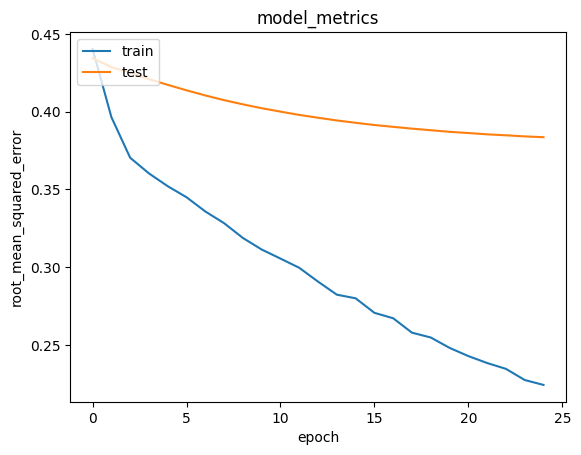

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Mendapatkan data buku yang belum pernah dibaca oleh pengguna kemudian menyimpannya ke dalam variabel books_not_visited sebagai daftar buku untuk direkomendasikan pada pengguna

In [ ]:
books_df = books_new

# Mengambil sample user
user_id = df['User-ID'].sample(1).iloc[0]
books_visited_by_user = df[df['User-ID'] == user_id]

# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html
books_not_visited = books_df[~books_df['id'].isin(books_visited_by_user.ISBN.values)]['id']
books_not_visited = list(
    set(books_not_visited)
    .intersection(set(books_to_books_encoded.keys()))
)

books_not_visited = [[books_to_books_encoded.get(x)] for x in books_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_books_array = np.hstack(
    ([[user_encoder]] * len(books_not_visited), books_not_visited)
)

Memperoleh rekomendasi buku menggunakan fungsi model.predict()

In [ ]:
ratings = model.predict(user_books_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_books_ids = [
    books_encoded_to_books.get(books_not_visited[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Books with high ratings from user')
print('----' * 8)

top_books_user = (
    books_visited_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .ISBN.values
)

books_df_rows = books_df[books_df['id'].isin(top_books_user)]
for row in books_df_rows.itertuples():
    print(row.book_title, ':', row.book_author)

print('----' * 8)
print('Top 10 books recommendation')
print('----' * 8)

recommended_books = books_df[books_df['id'].isin(recommended_books_ids)]
for row in recommended_books.itertuples():
    print(row.book_title, ':', row.book_author)

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Showing recommendations for users: 230522
Books with high ratings from user
--------------------------------
Cheaper and Better: Homemade Alternatives to Storebought Goods : Nancy Birnes
--------------------------------
Top 10 books recommendation
--------------------------------
The Sword of Maiden's Tears (Book One of the Twelve Treasures) : Rosemary Edghill
Treasure Island (Puffin Classics) : Robert Louis Stevenson
Preparation for the Sat: Scholastic Assessment Test/New Test : Edward J. Deptula
Royal Survivor: The Life of Charles II : Stephen Coote
10 Relatos Fantasticos : Varios
Rebelion en la Granja : George Orwell
Aristotle's Poetics : S. H. Butcher
Fox on the Box: Start to Read : Barbara Gregorich
The New French Baker: Perfect Pastries and Beautiful Breads from Your Kitchen : Sheila Linderman
Harry Potter and the Goblet of Fire : J. K. Rowling
